# Feature Extraction(GLCM) and Prediction

### Importing all the required libraries and custom files

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

#Importing Custom files
from cropAll import crop_contour_brain_img

In [2]:
# Checking the directory list

print(os.listdir("Project_images/"))

['train', 'validation']


### Calling the custom cropping function

In [3]:
# Calling the custom function for cropping all the images in Project_images folder

crop_contour_brain_img("Project_images/*/*") #Passing the folder path as parameter to the function

Project_images\train\Hamorrhage Stroke
___________________________________________________________
Project_images\train\Ischemic Stroke
___________________________________________________________
Project_images\train\Normal
___________________________________________________________
Project_images\validation\Hamorrhage Stroke
___________________________________________________________
Project_images\validation\Ischemic Stroke
___________________________________________________________
Project_images\validation\Normal
___________________________________________________________
New Directory created as Project_images_1 saving all the cropped images.


### Reading and appending images & their labels to empty list.

In [4]:
#Resize images to
SIZE = 512

In [5]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 

for directory_path in glob.glob("Project_images_1/train1/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images as gray scale
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Hamorrhage Stroke
Ischemic Stroke
Normal


In [6]:
#Doing exactly the same for test/validation images
test_images = []
test_labels = []
for directory_path in glob.glob("Project_images_1/validation1/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))       
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Hamorrhage Stroke
Ischemic Stroke
Normal


In [7]:
#print(test_labels)

### Encoding Labels to Integers.

In [8]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [9]:
print(test_labels_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


### Splitting training and testing data.

In [10]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

### FEATURE EXTRACTOR function

In [11]:
 # input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
        
    #START ADDING DATA TO THE DATAFRAME
  
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        GLCM_ASM = greycoprops(GLCM, 'ASM')[0]
        df['ASM'] = GLCM_ASM


      
        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2
        GLCM_ASM2 = greycoprops(GLCM2, 'ASM')[0]
        df['ASM2'] = GLCM_ASM2
        
       
        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        GLCM_ASM3 = greycoprops(GLCM3, 'ASM')[0]
        df['ASM3'] = GLCM_ASM3
        
        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        GLCM_ASM4 = greycoprops(GLCM4, 'ASM')[0]
        df['ASM4'] = GLCM_ASM4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        GLCM_ASM5 = greycoprops(GLCM5, 'ASM')[0]
        df['ASM5'] = GLCM_ASM5
        
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy


        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

### Extracting features from training images

In [12]:
image_features = feature_extractor(x_train)
X_for_ML =image_features
#Reshape to a vector for Random Forest
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_ML = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

In [13]:
print(image_features)

[[[0.13495526 0.99135476 5.3964882  ... 0.         0.02752992 6.82600143]
  [0.14011318 0.99222553 5.13751376 ... 0.         0.02904975 6.76187094]
  [0.12411644 0.99164238 4.46769891 ... 0.         0.02468919 6.81229176]
  ...
  [0.14166887 0.99028468 6.46568845 ... 0.         0.02990537 6.62415995]
  [0.14270699 0.99023654 6.4429848  ... 0.         0.03010287 6.61463297]
  [0.1521576  0.99345721 3.08944625 ... 0.         0.0379141  5.92085456]]]


### Defining Classifier Model (Random Forest)

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
# Fit the model on training data
RF_model.fit(X_for_ML, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

### Prediction on Test data

In [15]:
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [16]:
#Predict on test
test_prediction = RF_model.predict(test_for_RF)

In [17]:
print(test_prediction)

[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 0 0 0 0]


In [18]:
# Decoding Integers back to labels
test_prediction = le.inverse_transform(test_prediction)

### Accuracy & Confusion matrix

In [19]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.8


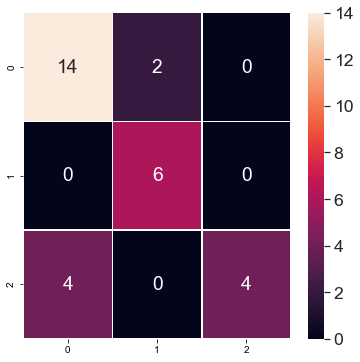

In [20]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

### Checking results on few random images

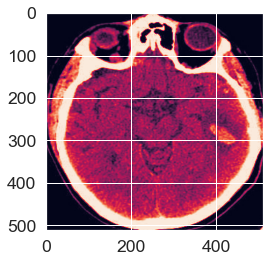

In [36]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

In [37]:
#Extract features and reshape to right dimensions

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))


#Predict
img_prediction = RF_model.predict(input_img_for_RF)
# img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name

print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['Hamorrhage Stroke']
The actual label for this image is:  Hamorrhage Stroke


C:\Users\Sakil\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Exporting the Model to a pickle file

In [23]:
# import pickle
# with open('Brain_Stroke_model.pickle','wb') as f:
#     pickle.dump(RF_model,f)

In [24]:
#import joblib

In [25]:
#joblib_file = "Stroke_Model.pkl"  
#joblib.dump(RF_model, joblib_file)